In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/Jneny/Hospitalcapacity/main/Data/icu_beds.csv'
data = read_csv(url, header=0, parse_dates=[0], index_col=0)
data = data.asfreq('d')
adultcrit = pd.DataFrame(data, columns=['adult_icu_crci_patients'])
sadultcrit = pd.Series(adultcrit.adult_icu_crci_patients)

In [3]:
size = 571
adtrain = adultcrit.iloc[:size]
adtest = adultcrit.iloc[size:]

In [6]:
adtest.head()

,adult_icu_crci_patients
date,
2021-11-23,133
2021-11-24,135
2021-11-25,135
2021-11-26,138
2021-11-27,132


In [4]:
model_whole = sm.tsa.ARIMA(adtrain, order = (1,1,1))
result_whole = model_whole.fit()

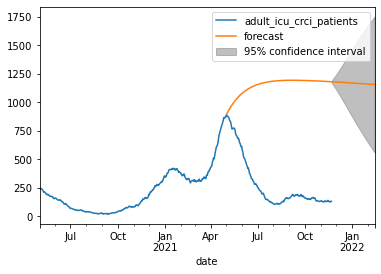

In [8]:
fig, ax = plt.subplots()
ax = adtrain.loc['2020-05-02':].plot(ax=ax)
fig = result_whole.plot_predict(start = '2021-05-02', end = "2022-02-14", dynamic=True, ax=ax, plot_insample=False)
plt.show()

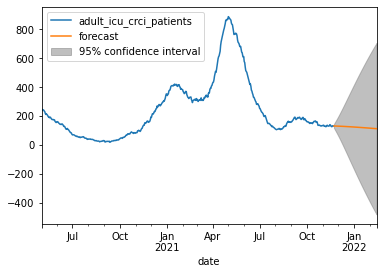

In [9]:
fig, ax = plt.subplots()
ax = adtrain.loc['2020-05-02':].plot(ax=ax)
fig = result_whole.plot_predict(start = '2021-11-23', end = "2022-02-14", dynamic=True, ax=ax, plot_insample=False)
plt.show()

In [10]:
predictions = result_whole.predict(start = '2021-11-23', end = "2022-02-14")

In [11]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

In [12]:
print(f'Mean Absolute Error = {mean_absolute_error(adtest,predictions)}')
print(f'Mean Squared Error = {mean_squared_error(adtest,predictions)}')

Mean Absolute Error = 330.35427825668523
Mean Squared Error = 141715.80588647412


In [20]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
rmse= math.sqrt(mean_squared_error(adtest['adult_icu_crci_patients'], predictions))
print(rmse)

376.4515983316768


In [23]:
# calculate mean absolute percentage error MAPE
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape(adtest['adult_icu_crci_patients'], predictions)

100.0836908528111

In [13]:
test2 = adultcrit['2021-07-01':]
train2 = adultcrit[:'2021-07-01']

In [14]:
model2 = sm.tsa.ARIMA(train2, order = (1,1,1))
result2 = model_whole.fit()

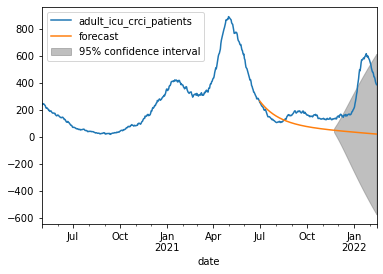

In [15]:
fig, ax = plt.subplots()
ax = adultcrit.plot(ax=ax)
fig = result2.plot_predict(start = '2021-07-01', end = "2022-02-14", dynamic=True, ax=ax, plot_insample=False)
plt.show()

In [16]:
prediction2 = result2.predict(start = '2021-07-01', end = "2022-02-14")

In [27]:
print(f'Mean Absolute Error = {mean_absolute_error(test2,prediction2)}')
print(f'Mean Squared Error = {mean_squared_error(test2,prediction2)}')
rmse2= math.sqrt(mean_squared_error(test2['adult_icu_crci_patients'], prediction2))
print(rmse2)
mape2= mape(test2['adult_icu_crci_patients'], prediction2)
print(mape2)

Mean Absolute Error = 218.99363495529806
Mean Squared Error = 67748.72227477048
260.28584724254694
100.45644246284344
